In [11]:
#import packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#package to load data
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [7]:
#package for creating model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [4]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [5]:
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [8]:
# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [10]:
#start your work

trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
model = define_model()
#split data
history = model.fit(trainX, trainY, epochs=10, 
                    validation_data=(testX, testY))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.3785 - accuracy: 0.8663 - val_loss: 0.3098 - val_accuracy: 0.8895
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2503 - accuracy: 0.9093 - val_loss: 0.2930 - val_accuracy: 0.8912
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2029 - accuracy: 0.9253 - val_loss: 0.2632 - val_accuracy: 0.9081
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1722 - accuracy: 0.9356 - val_loss: 0.2524 - val_accuracy: 0.9109
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1463 - accuracy: 0.9451 - val_loss: 0.2652 - val_accuracy: 0.9119
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1244 - accuracy: 0.9535 - val_loss: 0.2748 - val_accuracy: 0.9109
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - lo

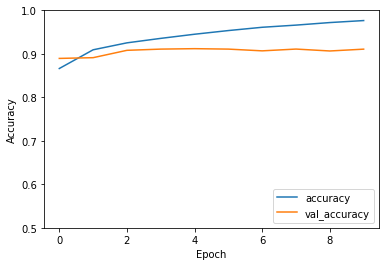

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [13]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

313/313 - 1s - loss: 0.3545 - accuracy: 0.9108 - 653ms/epoch - 2ms/step


([], <a list of 0 Text major ticklabel objects>)

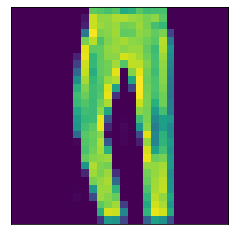

In [22]:
(trainimages, trainlabels), (testimages, testlabels) = fashion_mnist.load_data()
plt.imshow(testimages[5])
plt.xticks([])
plt.yticks([])

In [23]:
print(testlabels[5])

1


In [24]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag',
               'Ankle boot']

In [25]:
sample = testimages[5].reshape(1,28,28,1)
y_pred = model.predict(sample)

1/1 [==============================] - 0s 94ms/step


In [26]:
y_pred

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
np.argmax(y_pred)

1

In [28]:
class_names[1]

'Trouser'

In [37]:
#another prediction
def get_yourprediction(imagenumber):
  originalname = testlabels[imagenumber]
  originalclass = class_names[originalname]
  sample = testimages[imagenumber].reshape(1,28,28,1)
  y_pred = model.predict(sample)
  y_pred = np.argmax(y_pred)
  predicted_name = class_names[y_pred]
  plt.imshow(testimages[imagenumber])
  plt.xticks([])
  plt.yticks([])
  print('Original_name of image',originalclass)
  print('Predicted name of image',predicted_name)

1/1 [==============================] - 0s 16ms/step
Original_name of image Sandal
Predicted name of image Sandal


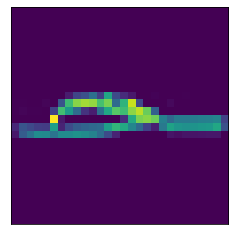

In [38]:
get_yourprediction(8)

1/1 [==============================] - 0s 14ms/step
Original_name of image T-shirt/top
Predicted name of image Shirt


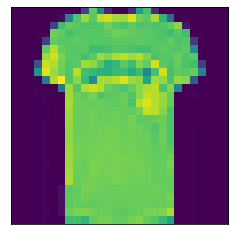

In [39]:
get_yourprediction(19)

1/1 [==============================] - 0s 14ms/step
Original_name of image Pullover
Predicted name of image Pullover


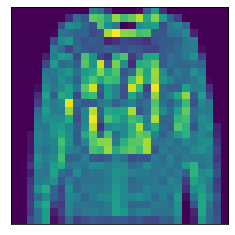

In [40]:
get_yourprediction(500)

1/1 [==============================] - 0s 16ms/step
Original_name of image T-shirt/top
Predicted name of image Shirt


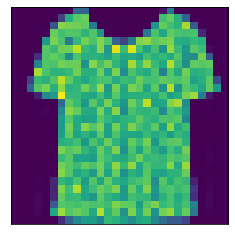

In [41]:
get_yourprediction(1000)